
# Pipeline de Machine Larning - Model

1- Excluir colunas e linhas
2- 


## 0 - Importar Bibliotecas

In [73]:
# Bibliotecas

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

## 1 - Carregar os dados brutos

In [31]:
# Carga dos dados

sample_products_csv = os.environ['DATASET_PATH']
df = pd.read_csv(sample_products_csv)

In [32]:
# Informações gerais

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         38000 non-null  int64  
 1   seller_id          38000 non-null  int64  
 2   query              38000 non-null  object 
 3   search_page        38000 non-null  int64  
 4   position           38000 non-null  int64  
 5   title              38000 non-null  object 
 6   concatenated_tags  37998 non-null  object 
 7   creation_date      38000 non-null  object 
 8   price              38000 non-null  float64
 9   weight             37942 non-null  float64
 10  express_delivery   38000 non-null  int64  
 11  minimum_quantity   38000 non-null  int64  
 12  view_counts        38000 non-null  int64  
 13  order_counts       17895 non-null  float64
 14  category           38000 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 4.3+ MB


In [33]:
df

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,13230578,1756482,mochila personalizada galinha pintadinha,1,2,Mochila Galinha Pintadinha M,primaria 2019 1 aninho abdulzinho mochilas ani...,2016-09-17 10:49:39,18.790000,149.0,1,27,321,NaN,Lembrancinhas
37996,6736914,9301388,tag dia dos pais,1,32,30 TAGS DIA DOS PAIS 005,dia pais,2019-06-12 17:03:52,31.680000,7.0,1,1,43,NaN,Papel e Cia
37997,11017911,8732362,kit bolsa maternidade,5,31,Kit bolsa bebê maternidade personalizada,paula carvalho bebe,2018-08-24 11:43:00,543.170000,3006.0,1,4,515,18.0,Bebê
37998,6807331,1869417,festa 15 anos,1,8,Chaveiro Almofada 15 anos,yasmin centro mesa compras 15 anos 2020 lembra...,2017-10-21 18:49:56,10.720000,18.0,1,53,2456,138.0,Lembrancinhas


In [34]:
df.columns.to_list()

['product_id',
 'seller_id',
 'query',
 'search_page',
 'position',
 'title',
 'concatenated_tags',
 'creation_date',
 'price',
 'weight',
 'express_delivery',
 'minimum_quantity',
 'view_counts',
 'order_counts',
 'category']

##  2 - Excluir Colunas e Linhas

In [35]:
# Excluir colunas

df.drop(columns=['product_id',
                 'seller_id',
                 'query',
                 'title',
                 'concatenated_tags',
                 'creation_date',
                 'express_delivery',
                 'order_counts'], inplace=True)

In [36]:
df.isnull().sum()

search_page          0
position             0
price                0
weight              58
minimum_quantity     0
view_counts          0
category             0
dtype: int64

In [37]:
# Excluir linhas

df.dropna(inplace=True)

In [47]:
df

,search_page,position,price,weight,minimum_quantity,view_counts,category
0,2,6,171.890000,1200.0,4,244,Decoração
1,2,0,77.670000,8.0,5,124,Papel e Cia
2,1,38,73.920006,2709.0,1,59,Outros
3,1,6,118.770004,0.0,1,180,Bebê
4,3,38,191.810000,507.0,6,34,Decoração
...,...,...,...,...,...,...,...
37995,1,2,18.790000,149.0,27,321,Lembrancinhas
37996,1,32,31.680000,7.0,1,43,Papel e Cia
37997,5,31,543.170000,3006.0,4,515,Bebê
37998,1,8,10.720000,18.0,53,2456,Lembrancinhas


## 3 - Transformar categoria em numero (vetor)

In [45]:
y = df['category']
df_y = LabelBinarizer().fit_transform(y)
print(df_y)

[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 ...
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]]


## 4 - Features de entrada

In [44]:
df_x = df.drop(['category'], axis=1).values

In [46]:
df_x

array([[2.0000000e+00, 6.0000000e+00, 1.7189000e+02, 1.2000000e+03,
        4.0000000e+00, 2.4400000e+02],
       [2.0000000e+00, 0.0000000e+00, 7.7670000e+01, 8.0000000e+00,
        5.0000000e+00, 1.2400000e+02],
       [1.0000000e+00, 3.8000000e+01, 7.3920006e+01, 2.7090000e+03,
        1.0000000e+00, 5.9000000e+01],
       ...,
       [5.0000000e+00, 3.1000000e+01, 5.4317000e+02, 3.0060000e+03,
        4.0000000e+00, 5.1500000e+02],
       [1.0000000e+00, 8.0000000e+00, 1.0720000e+01, 1.8000000e+01,
        5.3000000e+01, 2.4560000e+03],
       [1.0000000e+00, 8.0000000e+00, 3.9210000e+01, 5.0000000e+00,
        5.0000000e+00, 1.3200000e+02]])

## 4 - Treinar modelo com validação cruzada

In [76]:
parameters = {'n_estimators':[200,250], 'max_depth':[20,25]}
forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, n_jobs=-1, cv=5, refit=True, scoring='balanced_accuracy')
forest.fit(df_x, df_y)
forest.best_score_

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [53]:
forest.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=250)

## 5 - Metricas do modelo

In [55]:
models = []
models.append(('RANDOM', RandomForestClassifier(max_depth=25, n_estimators=250)))

In [64]:
def run_experiments(X, y, models) -> pd.DataFrame:
    
    dfs = []
    results = []
    names = []
    seed = 10
    
    # métricas de avaliação
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    # tipo de particionamento
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
    
    # para cada modelo/algoritmo ...
    for name, model in models:
        cv_results = model_selection.cross_validate(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [65]:
df_results = run_experiments(df_x, df_y, models)

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
df_results

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,40.882703,3.197196,0.524048,0.710828,0.524048,0.571212,0.823979,RANDOM
1,40.495331,4.299722,0.522335,0.750488,0.522335,0.573750,0.827287,RANDOM
2,46.887406,3.724109,0.517396,0.722739,0.517396,0.568866,0.818509,RANDOM
3,42.595105,3.569669,0.524512,0.700070,0.524512,0.568370,0.821352,RANDOM
4,43.615878,3.730333,0.512388,0.706625,0.512388,0.558754,0.819729,RANDOM


In [67]:
# RESULTADO POR MODELO

resultados_por_modelo = []
for model in list(set(df_results.model.values)):
    model_df = df_results.loc[df_results.model == model]
    resultados_por_modelo.append(model_df)

# DATAFRAME DOS RESULTADOS

df_final = pd.concat(resultados_por_modelo, ignore_index=True)

# MÉTRICA DOS RESULTADOS

results_long = pd.melt(df_final,id_vars=['model'],var_name='metrics', value_name='values')

# RESULTADOS POR TEMPO E SCORE

time_metrics = ['fit_time','score_time']

  # CLASSIFICAÇÃO
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')
  # TEMPO
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')


Text(0.5, 1.0, 'Comparando modelos para cada métrica de classificação')

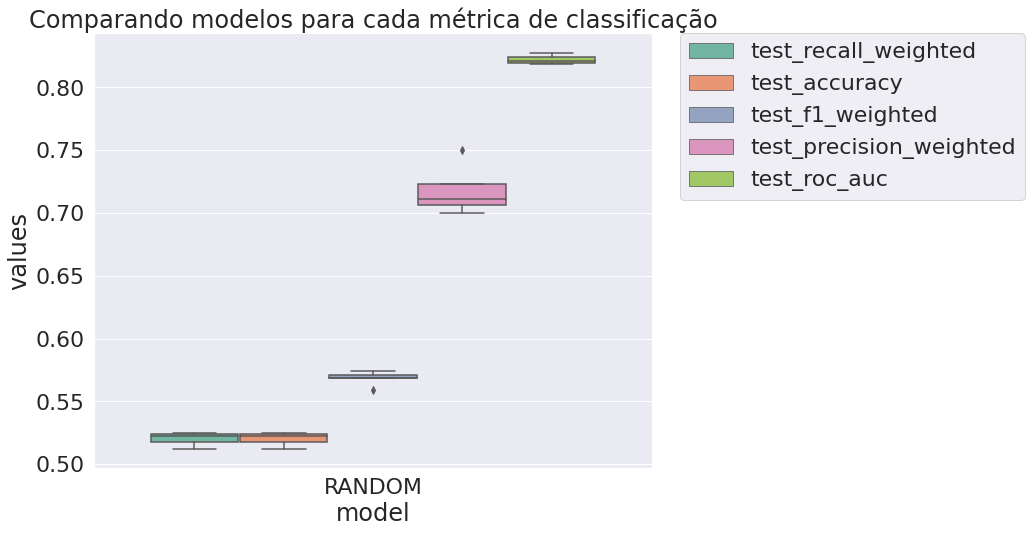

In [74]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparando modelos para cada métrica de classificação')

Text(0.5, 1.0, 'Comparação dos modelos para cada métrica de tempo')

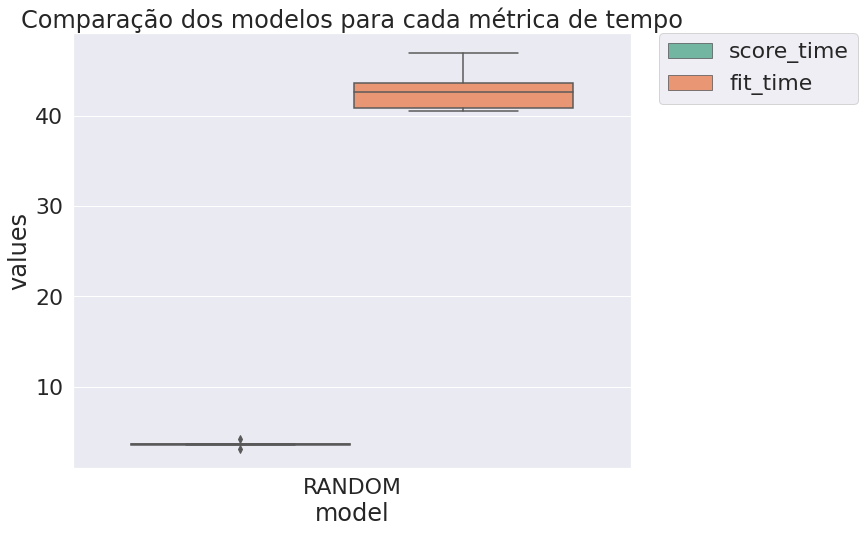

In [75]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparação dos modelos para cada métrica de tempo')

In [77]:
# Carga dos dados

test_products_csv = os.environ['TEST_PATH']
df_test = pd.read_csv(test_products_csv)

KeyError: 'TEST_PATH'